In [1]:
from SPARQLWrapper import SPARQLWrapper, JSON

sparql = SPARQLWrapper("https://query.wikidata.org/sparql")

query = """
SELECT ?item ?itemLabel
WHERE
{
  ?item wdt:P31 wd:Q12136.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
LIMIT 100
"""

sparql.setQuery(query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

for result in results["results"]["bindings"]:
    print(result["itemLabel"]["value"])

conjoined twins
bubonic plague
Zollinger–Ellison syndrome
Cushing's syndrome
lactose intolerance
mesenteric ischemia
epidemic pleurodynia
precocious puberty
dysarthria
Zuckerschleim
dermatitis
Upper airway resistance syndrome
chikungunya
congenital cystic adenomatoid malformation
cystitis
bladder exstrophy
Periampullary cancer
acute coronary syndrome
XYY syndrome
mitral valve insufficiency
stupor
Accelerated phase chronic myelogenous leukemia
foodborne illness
kuru
Ebstein anomaly
uveitis
urinary incontinence
Purtscher's retinopathy
AIDS phobia
activated protein C resistance
AAA disease
abasia
Schindler disease
abducens nerve palsy
nocturnal enuresis
inferiority complex
ablepharon
procrastination
Überköten
survivor guilt
aboulia
carcinoid syndrome
achlorhydria
achylia
adenocarcinoma
adermatoglyphia
aspergilloma
Adipsia
dhat syndrome
organic brain syndrome
XX male syndrome
angiomatosis
growth hormone deficiency
selective mutism
adult polyglucosan body disease
African horse sickness
pois

In [5]:
from SPARQLWrapper import SPARQLWrapper, JSON

sparql = SPARQLWrapper("https://query.wikidata.org/sparql")

query = """
SELECT DISTINCT ?disease1 ?disease2 ?symptom
WHERE {
  ?disease1 wdt:P780 ?symptom .
  ?disease2 wdt:P780 ?symptom .
  FILTER (?disease1 != ?disease2)
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
LIMIT 10
"""

sparql.setQuery(query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

disease_symptom_dict = {}

for result in results["results"]["bindings"]:
    disease1 = result["disease1"]["value"]
    disease2 = result["disease2"]["value"]
    symptom = result["symptom"]["value"]
    if disease1 not in disease_symptom_dict:
        disease_symptom_dict[disease1] = []
    if disease2 not in disease_symptom_dict:
        disease_symptom_dict[disease2] = []
    disease_symptom_dict[disease1].append((disease2, symptom))
    disease_symptom_dict[disease2].append((disease1, symptom))

for disease in disease_symptom_dict:
    disease_lst = disease.split('/')
    for d in disease_lst:
        if d.startswith('Q'):
            entity = d
    print(f"{entity}:")
    for rel in disease_symptom_dict[disease]:
        print(f"\t{rel[0]} shares symptom {rel[1]}")


Q83319:
	http://www.wikidata.org/entity/Q2840 shares symptom http://www.wikidata.org/entity/Q86
Q2840:
	http://www.wikidata.org/entity/Q83319 shares symptom http://www.wikidata.org/entity/Q86
	http://www.wikidata.org/entity/Q103177 shares symptom http://www.wikidata.org/entity/Q86
	http://www.wikidata.org/entity/Q114085 shares symptom http://www.wikidata.org/entity/Q86
	http://www.wikidata.org/entity/Q125367 shares symptom http://www.wikidata.org/entity/Q86
	http://www.wikidata.org/entity/Q133780 shares symptom http://www.wikidata.org/entity/Q86
	http://www.wikidata.org/entity/Q133823 shares symptom http://www.wikidata.org/entity/Q86
	http://www.wikidata.org/entity/Q153861 shares symptom http://www.wikidata.org/entity/Q86
	http://www.wikidata.org/entity/Q154874 shares symptom http://www.wikidata.org/entity/Q86
	http://www.wikidata.org/entity/Q154882 shares symptom http://www.wikidata.org/entity/Q86
	http://www.wikidata.org/entity/Q155098 shares symptom http://www.wikidata.org/entity/Q8

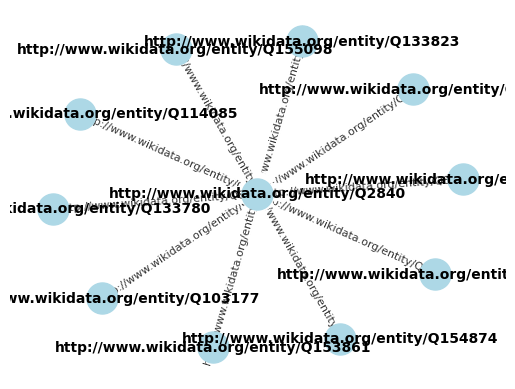

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Führen Sie die SPARQL-Abfrage aus, um die Beziehungen zwischen den Krankheiten zu erhalten

# Erstellen Sie ein leeres gerichtetes Graph-Objekt
G = nx.DiGraph()

# Fügen Sie jeden Knoten (Krankheit) zum Graphen hinzu
for disease in disease_symptom_dict:
    G.add_node(disease)

# Fügen Sie jede Kante (Beziehung zwischen Krankheiten) zum Graphen hinzu
for disease1 in disease_symptom_dict:
    for disease2, symptom in disease_symptom_dict[disease1]:
        G.add_edge(disease1, disease2, symptom=symptom)

# Zeichnen Sie den Graphen
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=1, alpha=0.5)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'symptom'), font_size=8, alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif', font_weight='bold')
plt.axis('off')
plt.show()

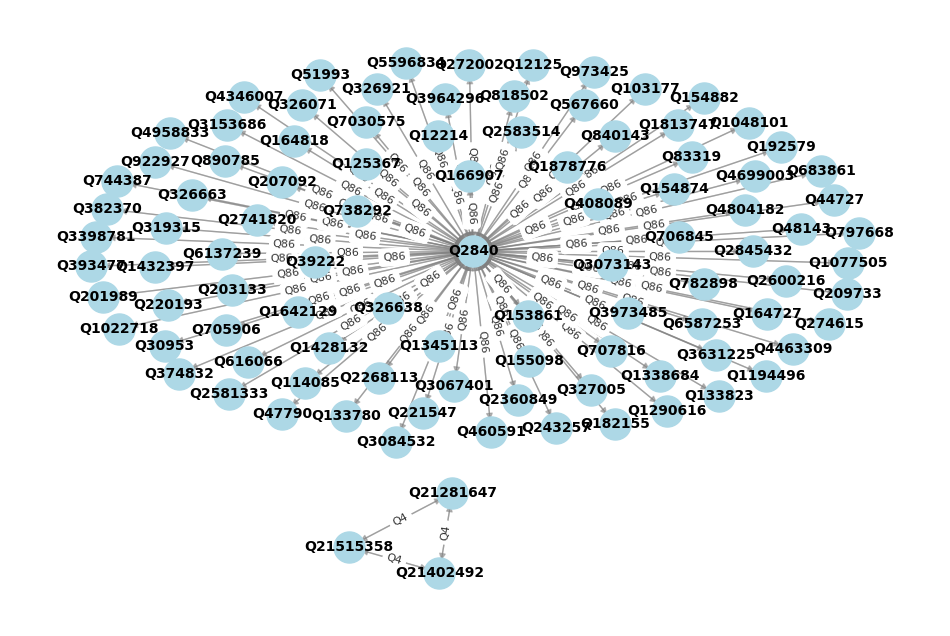

In [19]:
from SPARQLWrapper import SPARQLWrapper, JSON
import networkx as nx
import matplotlib.pyplot as plt

# SPARQL-Abfrage, um die Beziehungen zwischen den Krankheiten zu erhalten
sparql = SPARQLWrapper("https://query.wikidata.org/sparql")
query = """
SELECT DISTINCT ?disease1 ?disease2 ?symptom
WHERE {
  ?disease1 wdt:P780 ?symptom .
  ?disease2 wdt:P780 ?symptom .
  FILTER (?disease1 != ?disease2)
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
LIMIT 100
"""
sparql.setQuery(query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

disease_symptom_dict = {}

# Speichern Sie die Ergebnisse der SPARQL-Abfrage in einem Dictionary
for result in results["results"]["bindings"]:
    disease1 = result["disease1"]["value"].split("/")[-1]
    disease2 = result["disease2"]["value"].split("/")[-1]
    symptom = result["symptom"]["value"].split("/")[-1]
    if disease1 not in disease_symptom_dict:
        disease_symptom_dict[disease1] = []
    if disease2 not in disease_symptom_dict:
        disease_symptom_dict[disease2] = []
    disease_symptom_dict[disease1].append((disease2, symptom))
    disease_symptom_dict[disease2].append((disease1, symptom))

# Erstellen Sie ein leeres gerichtetes Graph-Objekt
G = nx.DiGraph()

# Fügen Sie jeden Knoten (Krankheit) zum Graphen hinzu
for disease in disease_symptom_dict:
    G.add_node(disease)

# Fügen Sie jede Kante (Beziehung zwischen Krankheiten) zum Graphen hinzu
for disease1 in disease_symptom_dict:
    for disease2, symptom in disease_symptom_dict[disease1]:
        G.add_edge(disease1, disease2, symptom=symptom)

# Zeichnen Sie den Graphen
pos = nx.spring_layout(G, k=0.5, iterations=50)
fig, ax = plt.subplots(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=1, alpha=0.5)
edge_labels = {(u, v): d["symptom"] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, alpha=0.8)
labels = {n: n.split(":")[-1] for n in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_family='sans-serif', font_weight='bold')
plt.axis('off')
plt.show()


In [12]:
import plotly.graph_objects as go

# Führen Sie die SPARQL-Abfrage aus, um die Beziehungen zwischen den Krankheiten zu erhalten

# Erstellen Sie eine Liste von Knoten (Krankheiten) und Kanten (Beziehungen zwischen den Krankheiten)
nodes = []
edges = []
for disease1 in disease_symptom_dict:
    for disease2, symptom in disease_symptom_dict[disease1]:
        nodes.append(disease1)
        nodes.append(disease2)
        edges.append((disease1, disease2, symptom))

# Entfernen Sie doppelte Knoten und Kanten
nodes = list(set(nodes))
edges = list(set(edges))

# Erstellen Sie das Plotly-Figure-Objekt
fig = go.Figure()

# Fügen Sie jeden Knoten (Krankheit) zum Figure-Objekt hinzu
for node in nodes:
    fig.add_trace(go.Scatter(
        x=[0],
        y=[0],
        mode="markers+text",
        marker=dict(size=30, color='lightblue'),
        text=[node],
        textposition="middle center",
        hovertemplate="<b>%{text}</b><extra></extra>"
    ))

# Fügen Sie jede Kante (Beziehung zwischen Krankheiten) zum Figure-Objekt hinzu
for edge in edges:
    fig.add_trace(go.Scatter(
        x=[nodes.index(edge[0]), nodes.index(edge[1])],
        y=[0, 0],
        mode="lines+markers+text",
        line=dict(color='gray', width=1),
        marker=dict(symbol='circle', size=10, color='gray'),
        text=[edge[2]],
        textposition="middle center",
        hovertemplate=f"<b>{edge[2]}</b><extra></extra>"
    ))

# Einstellungen der Layout-Optionen
fig.update_layout(
    showlegend=False,
    hovermode='closest',
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    margin=dict(t=20, b=20, l=20, r=20),
    height=600,
    clickmode='event+select'
)

# Anzeigen des interaktiven Netzwerkdiagramms
fig.show()


AttributeError: module 'networkx' has no attribute 'draw_network'

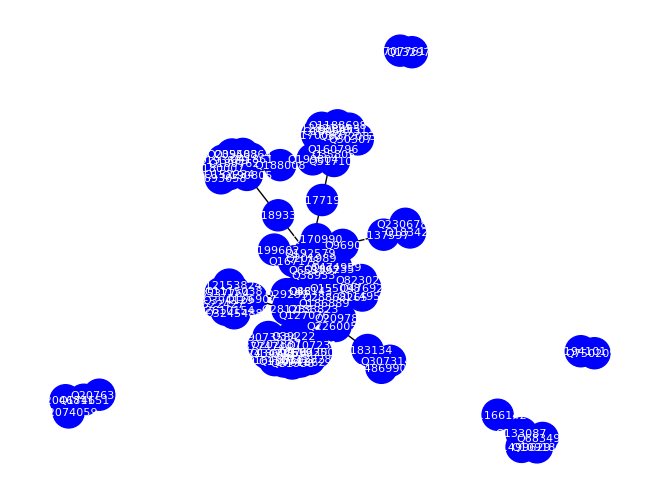

In [10]:
import requests
import networkx as nx

# SPARQL-Abfrage, um Krankheiten und ihre Symptome abzurufen
sparql_query = """
SELECT ?disease ?diseaseLabel ?symptom ?symptomLabel
WHERE {
  ?disease wdt:P31 wd:Q12136; # Erhalte nur die Entitäten, die eine Krankheit sind
           wdt:P780 ?symptom. # Erhalte alle Symptome der Krankheiten
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
LIMIT 100
"""

# Senden der SPARQL-Abfrage an die Wikidata API
url = "https://query.wikidata.org/sparql"
params = {'query': sparql_query, 'format': 'json'}
response = requests.get(url, params=params)
data = response.json()

# Erstellen eines Wörterbuchs mit Krankheiten und ihren Symptomen
disease_symptom_dict = {}
for item in data['results']['bindings']:
    disease = item['disease']['value'].split('/')[-1]
    symptom = item['symptom']['value']
    if disease not in disease_symptom_dict:
        disease_symptom_dict[disease] = []
    disease_symptom_dict[disease].append((symptom, item['symptomLabel']['value']))

# Erstellen des Graphen
G = nx.Graph()

# Fügen Sie jeden Knoten (Krankheit) zum Graphen hinzu
for disease in disease_symptom_dict:
    node_label = disease.split('/')[-1] # Verwenden Sie nur das QID der Krankheit als Knotenbeschriftung
    G.add_node(node_label, label=node_label, type='disease')

# Fügen Sie jede Kante (Beziehung zwischen Krankheiten) zum Graphen hinzu
for disease1 in disease_symptom_dict:
    for disease2, symptom in disease_symptom_dict[disease1]:
        G.add_edge(disease1.split('/')[-1], disease2.split('/')[-1], label=symptom, type='symptom')

# Erstellen der Positionen der Knoten im Graphen
pos = nx.spring_layout(G)

# Erstellen eines Farbcodes für jeden Knoten basierend auf dem Knotentyp
node_colors = []
for node in G.nodes:
    if node.startswith("Q"):
        node_colors.append('blue')
    else:
        node_colors.append('gray')


# Zeichnen des Graphen
nx.draw(G, pos, with_labels=True, font_size=8, node_size=500, node_color=node_colors, font_color='white')

# Erstellen der Beschriftungen für jede Kante (Beziehung zwischen Krankheiten)
edge_labels = {(edge[0], edge[1]): edge[2]['label'] for edge in G.edges(data=True)}

# Hinzufügen der Beschriftungen für jede Kante
nx.draw_network

In [13]:
import plotly.graph_objects as go

# Führen Sie die SPARQL-Abfrage aus, um die Beziehungen zwischen den Krankheiten zu erhalten

# Erstellen Sie eine Liste von Knoten (Krankheiten) und Kanten (Beziehungen zwischen den Krankheiten)
nodes = []
edges = []
for disease1 in disease_symptom_dict:
    for disease2, symptom in disease_symptom_dict[disease1]:
        nodes.append(disease1)
        nodes.append(disease2)
        edges.append((disease1, disease2, symptom))

# Entfernen Sie doppelte Knoten und Kanten
nodes = list(set(nodes))
edges = list(set(edges))

# Erstellen Sie das Plotly-Figure-Objekt
fig = go.Figure()

# Fügen Sie jeden Knoten (Krankheit) zum Figure-Objekt hinzu
for node in nodes:
    fig.add_trace(go.Scatter(
        x=[0],
        y=[node],
        mode="markers+text",
        marker=dict(size=30, color='lightblue'),
        text=[node],
        textposition="middle center",
        hovertemplate="<b>%{text}</b><extra></extra>"
    ))

# Fügen Sie jede Kante (Beziehung zwischen Krankheiten) zum Figure-Objekt hinzu
for edge in edges:
    fig.add_trace(go.Scatter(
        x=[nodes.index(edge[0]), nodes.index(edge[1])],
        y=[edge[0], edge[1]],
        mode="lines+markers+text",
        line=dict(color='gray', width=1),
        marker=dict(symbol='circle', size=10, color='gray'),
        text=[edge[2]],
        textposition="middle center",
        hovertemplate=f"<b>{edge[2]}</b><extra></extra>"
    ))

# Einstellungen der Layout-Optionen
fig.update_layout(
    showlegend=False,
    hovermode='closest',
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    margin=dict(t=20, b=20, l=20, r=20),
    height=600,
    clickmode='event+select'
)

# Anzeigen des interaktiven Netzwerkdiagramms
fig.show()